# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [89]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Kmodes
from kmodes.kmodes import KModes

# import KPrototypes
from kmodes.kprototypes import KPrototypes

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# import ployly to ploy 3D cluster graph
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

# Import seaborn
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Import module for data visualization
from plotnine import *
import plotnine

from sklearn import metrics

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# import DBSCAN
from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

## Read the data from the csv files

In [15]:
neighborhood = pd.read_csv('data/nyc_neighborhood.csv')

In [122]:
#df_neighborhood = neighborhood[['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']]
df_neighborhood = neighborhood[['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']]
#df_neighborhood = neighborhood[['br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']]


In [123]:
# Normalize the continuous values
scaler = StandardScaler()
df_neighborhood = scaler.fit_transform(df_neighborhood)

In [124]:
#df_neighborhood = pd.DataFrame(df_neighborhood, columns=['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020'])
df_neighborhood = pd.DataFrame(df_neighborhood, columns=['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020'])
#df_neighborhood = pd.DataFrame(df_neighborhood, columns=['br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020'])



In [125]:
df_neighborhood

,studio_2021,br_1_2021,br_2_2021,no_of_school,no_of_hospital,no_of_restaurant,no_of_bank,criminal_rate,population_2020
0,-0.622488,-0.584210,-0.640465,-1.039233,-0.454970,-0.981266,-0.703283,0.054651,0.140607
1,-0.838399,-0.825583,-0.816897,-0.744129,-0.454970,-0.399683,-0.503904,-0.927468,-0.739828
2,-0.068564,-0.032499,-0.253176,-0.980212,-0.454970,-1.330216,-0.603593,-0.902245,-0.552596
3,1.529179,1.719183,0.693532,-1.098254,-0.256448,-1.039425,-0.703283,-0.622472,-0.702762
4,-0.202578,-0.170427,-0.367641,-0.508045,-0.256448,0.181899,-0.603593,-0.826578,-0.778259
...,...,...,...,...,...,...,...,...,...
324,-0.503364,-0.480764,-0.382272,-0.803150,0.537637,0.879799,0.094236,-0.597637,-0.539114
325,-0.920296,-0.894547,-0.769562,-1.039233,-0.454970,-1.097583,-0.503904,-0.892932,-0.739828
326,-0.250227,-0.480764,-0.319445,1.616704,-0.057927,1.170590,1.190824,-0.002003,0.808034
327,-0.428912,-0.404904,-0.511369,-1.275316,-0.454970,-1.388374,-0.703283,1.380180,-0.718401


## k-means modeling

In [126]:
# Elbow Method for K means
def apply_elbow(model, df):
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,8), timings= True)
    visualizer.fit(df)        # Fit data to visualizer
    visualizer.show()        # Finalize and render figure
    return visualizer.elbow_value_

# Apply kmean for the dataset
def kmean_fit_and_predict(no_of_clusters, initial_runs, df):
    km = KMeans(n_clusters=no_of_clusters, # how many clusters we expected 
                n_init=initial_runs, # how many initial runs
                random_state=0)
    X = df.to_numpy()

    # fit and predict
    return  km.fit_predict(X)

def PCA_plot_2d(df, cluster, title):
    """
    Run PCA on the data and reduce the dimensions in pca_num_components dimensions
    
    PARAMS:
        df (pd.DataFrame): dataframe with filtered features including clustering results as column 'cluster'
    RETURN: 
        2d visualization of segmentations using scatter plot by reducing dimentions with PCA.
    """
    
    df_2d = PCA(n_components=2).fit_transform(df)
    data = pd.DataFrame(df_2d, columns=['PCA1','PCA2'])
    data['cluster'] = cluster

    sns.scatterplot(x='PCA1',
                    y='PCA2',
                    hue=data['cluster'],
                    palette='deep',
                    data=data)
    plt.title(title)
    plt.show()
    
def print_radar(r):
    df_r = pd.DataFrame(dict(r=r,
                             #theta=['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']))
                             #theta=['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']))
                             theta=['br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']))
    fig = px.line_polar(df_r, r='r', theta='theta', line_close=True)
    fig.show()
    
def get_radar_value_by_std(x, mean):
    if x - mean >= 2:
        return 5
    elif x - mean > 1 and x - mean <= 2:
        return 4
    elif x - mean > 0 and x - mean <= 1:
        return 3
    elif x - mean > -1 and x - mean <= 0:
        return 2
    elif x - mean > -2 and x - mean <= -1:
        return 1
    else:
        return 0
    
def get_radar_value_by_rescale(x, min_value, max_value):
    return round( (x - min_value) /  ((max_value - min_value)/5) )

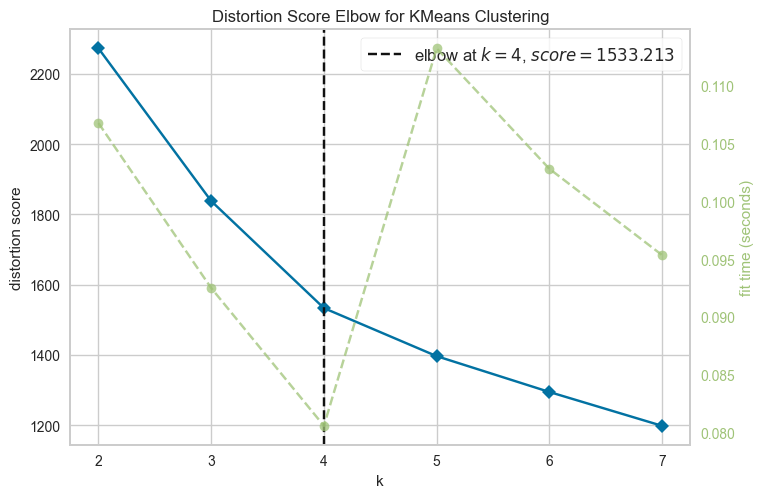

0.25170646889453924
76.36252823965158


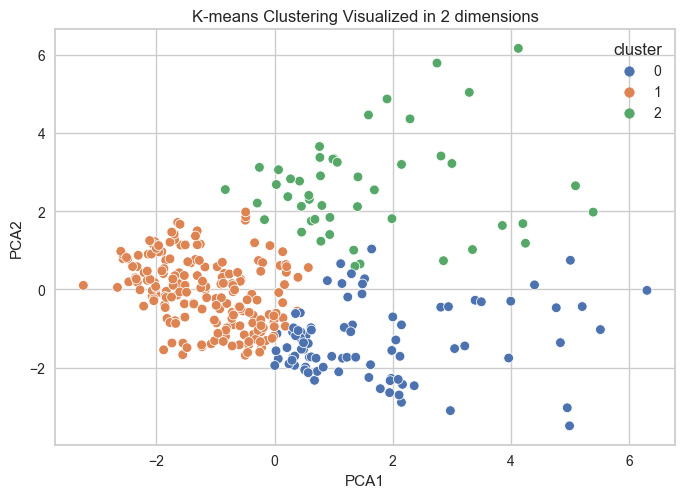

In [134]:
df_kmean = df_neighborhood.copy()
model = KMeans() # setup the model 
elbow_k = apply_elbow(model, df_kmean) # use the k value returned by the Elbow Method
if elbow_k is None:
     elbow_k = 3

elbow_k = 3
    
kmean_cluster = kmean_fit_and_predict(elbow_k, 20, df_kmean)

my_model = KMeans().fit(df_kmean.to_numpy())
labels = my_model.labels_
print(metrics.silhouette_score(df_kmean,labels))
print(metrics.calinski_harabasz_score(df_kmean, labels))

PCA_plot_2d(df_kmean, kmean_cluster, 'K-means Clustering Visualized in 2 dimensions')
df_kmean['cluster'] = kmean_cluster

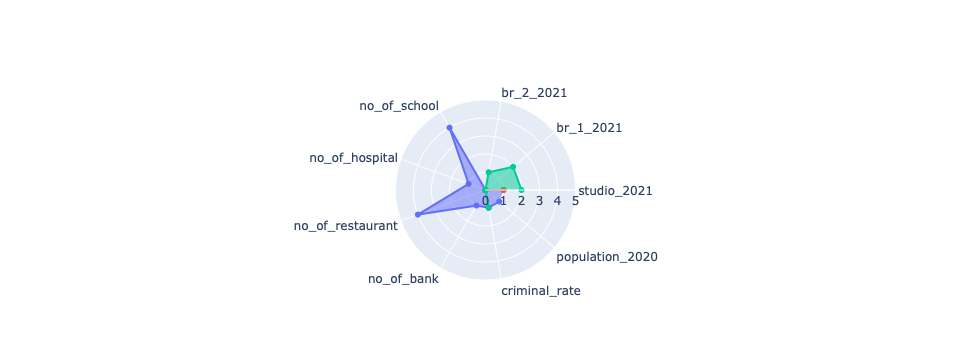

In [135]:
#categories = ['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']
categories = ['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']
#categories = ['br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']


fig = go.Figure()
    
for i in set(df_kmean['cluster']):
    r = []
    #r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['latitude'].mean(), df_neighborhood['latitude'].mean()))
    #r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['longitude'].mean(), df_neighborhood['longitude'].mean()))

    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['studio_2021'].mean(), df_neighborhood['studio_2021'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['br_1_2021'].mean(), df_neighborhood['br_1_2021'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['br_2_2021'].mean(), df_neighborhood['br_2_2021'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['no_of_school'].mean(), df_neighborhood['no_of_school'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['no_of_hospital'].mean(), df_neighborhood['no_of_hospital'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['no_of_restaurant'].mean(), df_neighborhood['no_of_restaurant'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['no_of_bank'].mean(), df_neighborhood['no_of_bank'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['criminal_rate'].mean(), df_neighborhood['criminal_rate'].mean()))
    # r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i]['population_2020'].mean(), df_neighborhood['population_2020'].mean()))

    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['studio_2021'].mean(), df_neighborhood['studio_2021'].min(), df_neighborhood['studio_2021'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['br_1_2021'].mean(), df_neighborhood['br_1_2021'].mean(), df_neighborhood['br_1_2021'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['br_2_2021'].mean(), df_neighborhood['br_2_2021'].mean(), df_neighborhood['br_2_2021'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['no_of_school'].mean(), df_neighborhood['no_of_school'].mean(), df_neighborhood['no_of_school'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['no_of_hospital'].mean(), df_neighborhood['no_of_hospital'].mean(), df_neighborhood['no_of_hospital'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['no_of_restaurant'].mean(), df_neighborhood['no_of_restaurant'].mean(), df_neighborhood['no_of_restaurant'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['no_of_bank'].mean(), df_neighborhood['no_of_bank'].mean(), df_neighborhood['no_of_bank'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['criminal_rate'].mean(), df_neighborhood['criminal_rate'].mean(), df_neighborhood['criminal_rate'].max()))
    r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i]['population_2020'].mean(), df_neighborhood['population_2020'].mean(), df_neighborhood['population_2020'].max()))


    
    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=categories,
          fill='toself',
          name='Cluster'+str(i)
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

## hierarchical modeling

In [82]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

In [83]:
# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [84]:
df_hierarchical = df_neighborhood.copy()

# fit and predict
hierarchical_cluster = ac.fit_predict(df_hierarchical)

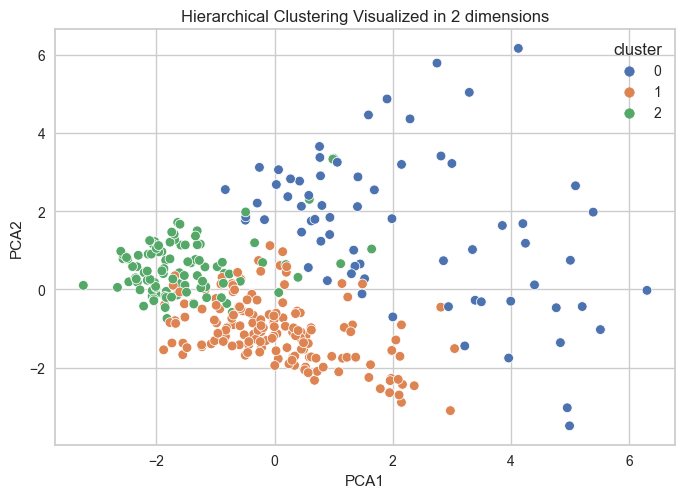

In [85]:
PCA_plot_2d(df_hierarchical, hierarchical_cluster, 'Hierarchical Clustering Visualized in 2 dimensions')

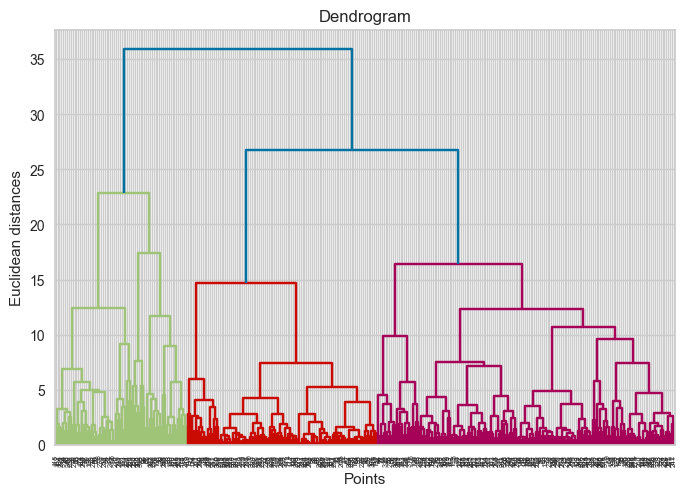

In [86]:
# Plot dendrogram
plot_dendrogram(df_hierarchical)

In [87]:
df_hierarchical['cluster'] = hierarchical_cluster

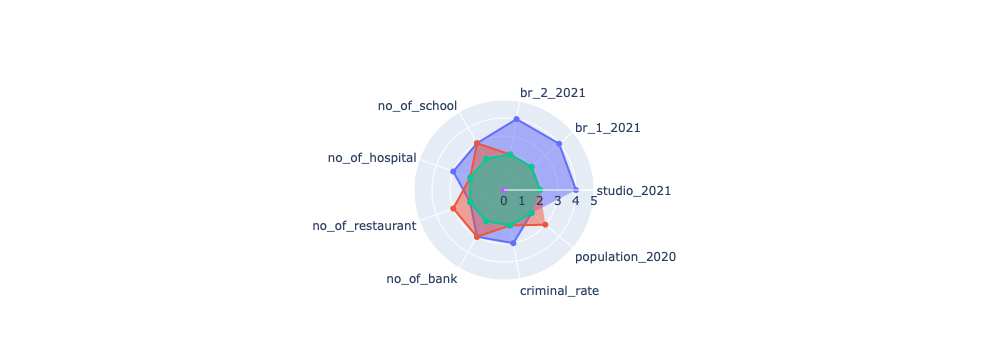

In [88]:
#categories = ['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']
categories = ['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']

fig = go.Figure()
    
for i in set(df_kmean['cluster']):
    r = []
    #r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['latitude'].mean(), df_neighborhood['latitude'].mean()))
    #r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['longitude'].mean(), df_neighborhood['longitude'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['studio_2021'].mean(), df_neighborhood['studio_2021'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['br_1_2021'].mean(), df_neighborhood['br_1_2021'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['br_2_2021'].mean(), df_neighborhood['br_2_2021'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['no_of_school'].mean(), df_neighborhood['no_of_school'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['no_of_hospital'].mean(), df_neighborhood['no_of_hospital'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['no_of_restaurant'].mean(), df_neighborhood['no_of_restaurant'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['no_of_bank'].mean(), df_neighborhood['no_of_bank'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['criminal_rate'].mean(), df_neighborhood['criminal_rate'].mean()))
    r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i]['population_2020'].mean(), df_neighborhood['population_2020'].mean()))

    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=categories,
          fill='toself',
          name='Cluster'+str(i)
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

## DBSCAN Modeling

In [91]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [92]:
df_dbscan = df_neighborhood.copy()

# fit and predict
dbscan_cluster = db.fit_predict(df_dbscan)

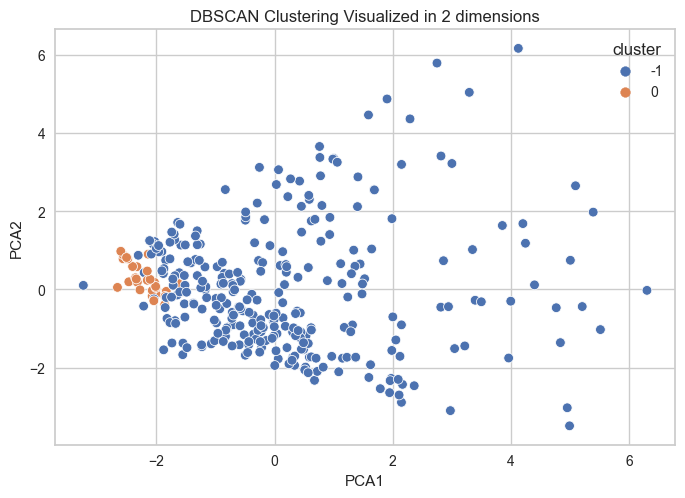

In [93]:
PCA_plot_2d(df_dbscan, dbscan_cluster, 'DBSCAN Clustering Visualized in 2 dimensions')

In [94]:
df_dbscan['cluster'] = dbscan_cluster

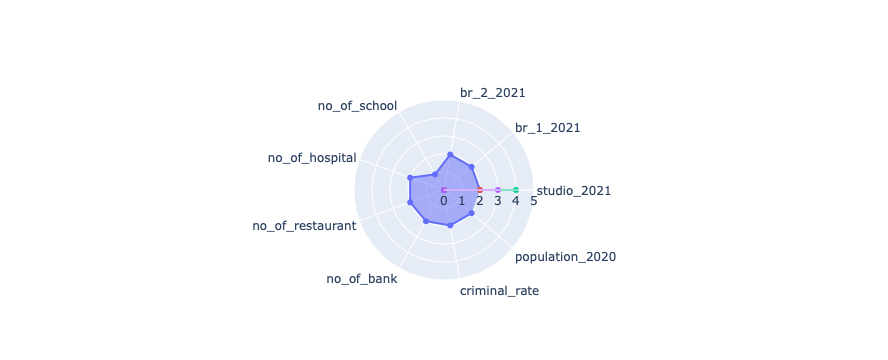

In [95]:
#categories = ['latitude', 'longitude', 'studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']
categories = ['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'criminal_rate', 'population_2020']

fig = go.Figure()
    
for i in set(df_kmean['cluster']):
    r = []
    #r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['latitude'].mean(), df_neighborhood['latitude'].mean()))
    #r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['longitude'].mean(), df_neighborhood['longitude'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_kmean['cluster'] == i]['studio_2021'].mean(), df_neighborhood['studio_2021'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['br_1_2021'].mean(), df_neighborhood['br_1_2021'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['br_2_2021'].mean(), df_neighborhood['br_2_2021'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['no_of_school'].mean(), df_neighborhood['no_of_school'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['no_of_hospital'].mean(), df_neighborhood['no_of_hospital'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['no_of_restaurant'].mean(), df_neighborhood['no_of_restaurant'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['no_of_bank'].mean(), df_neighborhood['no_of_bank'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['criminal_rate'].mean(), df_neighborhood['criminal_rate'].mean()))
    r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i]['population_2020'].mean(), df_neighborhood['population_2020'].mean()))

    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=categories,
          fill='toself',
          name='Cluster'+str(i)
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

## Segmentation of NYC neighborhoods

The goal of this project is to segment the neighborhoods of New York City into separate clusters and examine the information about them. For clustering, We can use any available information **except** demographic and economic indicators. We don't want to segment them based on those and we want to keep them for the **profiling of clusters** to see if there are any important economic differences between the created clusters.

### Feature Engineering

Feature engineering plays a crucial role in this problem. We have limited amount of attributes so we need to create some features that will be important for segmentation.

- Google Places, Yelp and Foursquare APIs: number of venues, density of venues per square mile, number of restaurants, top restarurant category...
- Uber: number of rides per day in the neighborhood
- Meetups: number of events
- etc...

### Feature Selection / Dimensionality Reduction¶
We need to apply different selection techniques to find out which one will be the best for our problems.

Original Features vs. PCA conponents?

Don't forget to scale the features for KMeans.

### Modeling

Use different attributes and clustering techniques and compare the created clusters:

- clustering only on restaurant features
- clustering only on Uber features
- clustering only on location
- combination of all

**Questions:**
1. Which clustering is the best?
2. How are neighborhoods split when we select only 2 clusters?
3. Are there any differences in housing and rental costs in different clusters?

### Evaluation

1. Check the segmentation evaluation metrics:
    - inertia
    - silhoutte score
2. How did you come up with the correct number of clusters?
3. Is there any relationship between the clusters and economic indicators? If yes, what does it mean?

You are required to share the file containing all NYC neighborhoods together with cluster_id with LighthouseLabs.